In [1]:
include("Include.jl")

  Activating project at `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-7/L7a`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-7/L7a/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-7/L7a/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-7/L7a/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-7/L7a/Manifest.toml`


computeshortestpaths (generic function with 1 method)

In [2]:
function frame(scene, framenumber, g)
    framenumber == 1 && return

    # run Dijkstra's algorithm

    ds = dijkstra_shortest_paths(g, 1, allpaths=true, trackvertices=true)

    # for which destination vertex?
    destv = framenumber

    # get the vertices on the path
    _, ep = enumerate_paths(ds, [1, destv])

    # convert to edges
    vlist = [Edge(p[1] => p[2]) for p in zip(ep, circshift(ep, -1))]

    # draw background graph
    background("grey10")
    sethue("grey40")
    drawgraph(g, layout=stress, vertexshapes=:circle)
    path = Point[]

    # draw shortest path
    drawgraph(g,
        layout=stress,
        vertexlabelfontsizes=2,
        vertexshapes=:circle,
        edgelist = vlist[1:end-1],
        edgefunction = (n, s, d, f, t) -> begin
            push!(path, f)
            push!(path, t)
        end)
    sethue("orange")
    setline(10)
    setlinejoin("bevel")
    poly(path, :stroke, close=false)
    sethue("red")
    circle.(path[[1, end]], 2, :fill)
end

frame (generic function with 1 method)

In [3]:
# load the data -
# path_to_data_file = joinpath(_PATH_TO_DATA, "soc-sign-bitcoinalpha.csv");
path_to_data_file = joinpath(_PATH_TO_DATA, "SimpleGraph.txt");

# read the edges -
myedges = readedgesfile(path_to_data_file, delim=',', comment='#')

# build the graph -
dag = build(MySimpleDirectedGraphModel, myedges)
g = _convert(dag, maxnodes = 150, maxedges=10000000, offset=1);

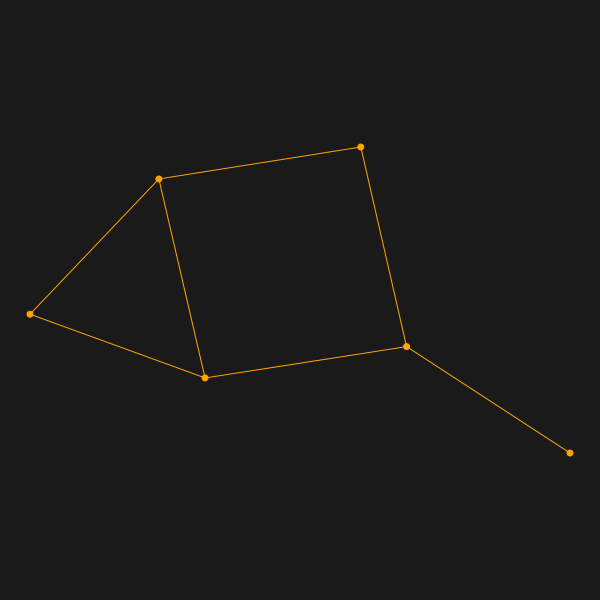

In [10]:
layout = (g) -> spectral(adjacency_matrix(g), dim=2)
@drawsvg begin
    background("grey10")
    sethue("orange")
    drawgraph(g, layout = stress, edgelabels = :none, vertexshapesizes=3)
end 600 600

In [15]:
Drawing(600,600, "test.pdf")
origin()
background("grey10")
sethue("orange")
drawgraph(g, layout = stress, 
    edgelabels = :none, edgecurvature=0,
    vertexshapesizes = [Graphs.degree(g, v) for v in Graphs.vertices(g)], 
    vertexfillcolors = (v) -> mod(v,2) == 0 && colorant"lightskyblue");
finish()
preview()

In [14]:
# amovie = Movie(1920, 1080, "dijkstra")
# animate(amovie, Scene(amovie, (s, f) -> frame(s, f, g), 1:6), framerate=10)

┌ Info: Frames for animation "dijkstra" are being stored in directory: 
└ 	 /var/folders/_1/ctjh19v17193_hhpv7hpr7qr0000gn/T/jl_n7cgAd
┌ Warning: Movie framerange is longer than scene frame range: 
│ 	 1:250 > 6
└ @ Luxor ~/.julia/packages/Luxor/vFOwQ/src/animate.jl:203
┌ Info: ... 6 frames saved in directory:
└ 	 /var/folders/_1/ctjh19v17193_hhpv7hpr7qr0000gn/T/jl_n7cgAd


true